In [1]:
from modules import dataframe_manip as hp
from IPython.display import Markdown, display
import pytz
import pandas as pd
import numpy as np
import warnings
from datetime import datetime as dt
import matplotlib.pyplot as plt
from importlib import reload
warnings.filterwarnings('ignore')

from IPython.display import display, clear_output
import ipywidgets as widgets

# User modules.
from modules import schemas, College1AcPtTimeSeries
College1AcPtTimeSeries = reload(College1AcPtTimeSeries)

In [2]:
def printmd(string):
    display(Markdown(string))

In [3]:
schema: schemas.AcPtTimeSeries =\
    College1AcPtTimeSeries.College1AcPtTimeSeries

building_list = list(schema.buildings())

In [4]:
data = hp.csv_to_timeseries_df(filepath='sample_data.csv', timezone=pytz.timezone('US/Pacific'))

In [5]:
w1 = widgets.Dropdown(
    options=building_list,
    value = building_list[0],
    description='List',
)

w2 = widgets.Dropdown(
    options=building_list,
    value = building_list[0],
    description='List',
)

w3 = widgets.Dropdown(
    options=building_list,
    value = building_list[0],
    description='List',
)

In [6]:
def on_change_hourly(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        temp = hp.get_hourly_data_building(data, change['new'])
        temp['y'] = temp.sum(axis=1)
        temp = temp.replace(0, np.nan) # replaces all 0s with NaN
#         max_value = int(temp.max().max())
#         binwidth = int(max_value / 10)
#         bin_size = range(0, max_value + binwidth, binwidth)

        # Plotting
        fig, axes = plt.subplots(nrows=1, ncols=2)
        ax = temp['y'].plot.hist(alpha=0.5, title=change['new']+'(building average)', legend=None, ax=axes[1], figsize=(15, 5))
        ax.set_xlabel('Hourly Occupancy')
        temp = temp.drop('y', 1)
        ax = temp.plot.hist(alpha=0.5, title=change['new']+'(APs)', legend=None, ax=axes[0], figsize=(15, 5))
        ax.set_xlabel('Hourly Occupancy')
        clear_output()
        display(w1)

In [7]:
def on_change_daily(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        temp = hp.get_hourly_data_building(data, change['new'])
        temp = temp.resample('D').mean() #daily mean
        temp['y'] = temp.sum(axis=1)
        temp = temp.replace(0, np.nan) # replaces all 0s with NaN

        # Plotting
        fig, axes = plt.subplots(nrows=1, ncols=2)
        ax = temp['y'].plot.hist(alpha=0.5, y='y', title=change['new']+'(building average)', legend=None, ax=axes[1], figsize=(15, 5))
        ax.set_xlabel('Daily Occupancy')
        temp = temp.drop('y', 1)
        ax = temp.plot.hist(alpha=0.5, title=change['new']+'(APs)', legend=None, ax=axes[0], figsize=(15, 5))
        ax.set_xlabel('Daily Occupancy')
        clear_output()
        display(w2)

In [8]:
def on_change_weekday(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        building = change['new']
        temp = hp.get_hourly_data_building(data, building)


        # Plotting occupancy by building
        temp['y'] = temp.sum(axis=1)
        temp = temp.replace(0, np.nan) # replaces all 0s with NaN

        pd.to_datetime(temp.index.values)
        temp['weekday'] = temp.index.dayofweek
        monday = temp[temp['weekday'] == 0]
        tuesday = temp[temp['weekday'] == 1]
        wednesday = temp[temp['weekday'] == 2]
        thursday = temp[temp['weekday'] == 3]
        friday = temp[temp['weekday'] == 4]
        saturday = temp[temp['weekday'] == 5]
        sunday = temp[temp['weekday'] == 6]
        
        # Normalize x axis
        max_array = [
            monday['y'].max(), tuesday['y'].max(), wednesday['y'].max(), thursday['y'].max(), 
            friday['y'].max(), saturday['y'].max(), sunday['y'].max()]
        
        max_value = int(max(max_array))
        binwidth = int(max_value / 10)
        bin_size = range(0, max_value + binwidth, binwidth)

        fig, axes = plt.subplots(nrows=1, ncols=2)
        ax = monday['y'].plot.hist(alpha=0.5, title='Monday(Building) - '+building, legend=None, ax=axes[0], figsize=(15, 5), bins=bin_size)
        ax.set_xlabel('Hourly Occupancy')
        ax = tuesday['y'].plot.hist(alpha=0.5, title='Tuesday(Building) - '+building, legend=None, ax=axes[1], figsize=(15, 5), bins=bin_size)
        ax.set_xlabel('Hourly Occupancy')

        fig, axes = plt.subplots(nrows=1, ncols=2)
        ax = wednesday['y'].plot.hist(alpha=0.5, title='Wednesday(Building) - '+building, legend=None, ax=axes[0], figsize=(15, 5), bins=bin_size)
        ax.set_xlabel('Hourly Occupancy')
        ax = thursday['y'].plot.hist(alpha=0.5, title='Thursday(Building) - '+building, legend=None, ax=axes[1], figsize=(15, 5), bins=bin_size)
        ax.set_xlabel('Hourly Occupancy')

        fig, axes = plt.subplots(nrows=1, ncols=2)
        ax = friday['y'].plot.hist(alpha=0.5, title='Friday(Building) - '+building, legend=None, ax=axes[0], figsize=(15, 5), bins=bin_size)
        ax.set_xlabel('Hourly Occupancy')
        ax = saturday['y'].plot.hist(alpha=0.5, title='Saturday(Building) - '+building, legend=None, ax=axes[1], figsize=(15, 5), bins=bin_size)
        ax.set_xlabel('Hourly Occupancy')

        fig, axes = plt.subplots(nrows=1, ncols=1)
        ax = sunday['y'].plot.hist(alpha=0.5, title='Sunday(Building) - '+building, legend=None, ax=axes, figsize=(7, 5), bins=bin_size)
        ax.set_xlabel('Hourly Occupancy')


        # Plotting occupancy by APs
        monday = monday.drop('y', 1)
        monday = monday.drop('weekday', 1)
        tuesday = tuesday.drop('y', 1)
        tuesday = tuesday.drop('weekday', 1)
        wednesday = wednesday.drop('y', 1)
        wednesday = wednesday.drop('weekday', 1)
        thursday = thursday.drop('y', 1)
        thursday = thursday.drop('weekday', 1)
        friday = friday.drop('y', 1)
        friday = friday.drop('weekday', 1)
        saturday = saturday.drop('y', 1)
        saturday = saturday.drop('weekday', 1)
        sunday = sunday.drop('y', 1)
        sunday = sunday.drop('weekday', 1)

        fig, axes = plt.subplots(nrows=1, ncols=2)
        ax = monday.plot.hist(alpha=0.5, title='Monday(APs) - '+building, legend=None, ax=axes[0], figsize=(15, 5))
        ax.set_xlabel('Hourly Occupancy')
        ax = tuesday.plot.hist(alpha=0.5, title='Tuesday(APs) - '+building, legend=None, ax=axes[1], figsize=(15, 5))
        ax.set_xlabel('Hourly Occupancy')

        fig, axes = plt.subplots(nrows=1, ncols=2)
        ax = wednesday.plot.hist(alpha=0.5, title='Wednesday(APs) - '+building, legend=None, ax=axes[0], figsize=(15, 5))
        ax.set_xlabel('Hourly Occupancy')
        ax = thursday.plot.hist(alpha=0.5, title='Thursday(APs) - '+building, legend=None, ax=axes[1], figsize=(15, 5))
        ax.set_xlabel('Hourly Occupancy')

        fig, axes = plt.subplots(nrows=1, ncols=2)
        ax = friday.plot.hist(alpha=0.5, title='Friday(APs) - '+building, legend=None, ax=axes[0], figsize=(15, 5))
        ax.set_xlabel('Hourly Occupancy')
        ax = saturday.plot.hist(alpha=0.5, title='Saturday(APs) - '+building, legend=None, ax=axes[1], figsize=(15, 5))
        ax.set_xlabel('Hourly Occupancy')

        fig, axes = plt.subplots(nrows=1, ncols=1)
        ax = sunday.plot.hist(alpha=0.5, title='Sunday(APs) - '+building, legend=None, ax=axes, figsize=(7, 5))
        ax.set_xlabel('Hourly Occupancy')
        clear_output()
        display(w3)

Dropdown(description='List', index=3, options=('BUILDING50', 'BUILDING23', 'BUILDING16', 'BUILDING11', 'BUILDI…

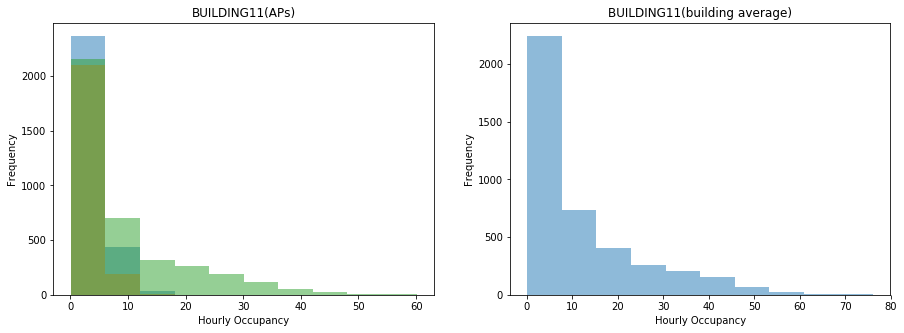

In [9]:
display(w1)
w1.observe(on_change_hourly)

In [10]:
display(w2)
w2.observe(on_change_daily)

Dropdown(description='List', options=('BUILDING50', 'BUILDING23', 'BUILDING16', 'BUILDING11', 'BUILDING14', 'B…

In [11]:
display(w3)
w3.observe(on_change_weekday)

Dropdown(description='List', options=('BUILDING50', 'BUILDING23', 'BUILDING16', 'BUILDING11', 'BUILDING14', 'B…